In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('train_set.csv',index_col=0)
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Age of Company,Python,Spark,AWS,Excel,Job Categories,Seniority,Description_Length,Competitor Count,Revenue_Adj
318,"Sr. Data Scientist, Cyber-Security LT Contract",$116K-$194K (Glassdoor est.),SUMMARYSenior Data Scientist will assist the c...,3.2,"Numeric, LLC","Phila, PA","Chadds Ford, PA",1 to 50 employees,-1,Company - Private,...,30,1,1,1,1,Data Scientist,Senior,208,0,small
533,Director Data Science,$124K-$199K (Glassdoor est.),We’re looking for a director to drive our data...,3.6,TRANZACT,"Fort Lee, NJ","Fort Lee, NJ",1001 to 5000 employees,1989,Company - Private,...,33,1,0,1,1,Director,none,753,0,Unknown / Non-Applicable
539,Senior Scientist - Biostatistician,$65K-$96K (Glassdoor est.),British American Tobacco\nReynolds American In...,3.1,Reynolds American,"Winston-Salem, NC","Winston-Salem, NC",5001 to 10000 employees,1875,Company - Private,...,147,0,0,0,1,Data Analyst,Senior,698,0,big
653,Data Engineer - Consultant (Charlotte Based),$59K-$112K (Glassdoor est.),Do YOU love working with Data in machine learn...,4.2,Clarity Insights,"Charlotte, NC","Chicago, IL",201 to 500 employees,2008,Company - Private,...,14,1,0,0,1,Data Engineer,none,765,0,Unknown / Non-Applicable
586,Data Scientist,$108K-$171K (Glassdoor est.),Advanced degree in Data Science Statistics Com...,3.5,e-IT Professionals Corp.,"Foster City, CA","Canton, MI",51 to 200 employees,-1,Company - Private,...,30,1,0,0,0,Data Scientist,none,158,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,Data Engineer,$57K-$80K (Glassdoor est.),Position Summary:\n\nThe Data Engineer will be...,3.5,Saama Technologies Inc,"Phoenix, AZ","Campbell, CA",501 to 1000 employees,1997,Company - Private,...,25,1,1,0,0,Data Engineer,none,151,3,Unknown / Non-Applicable
79,"Director, Data Science",$139K-$220K (Glassdoor est.),"Reporting to the Sr. Director, Analytics & Dat...",3.6,Grainger,"Lake Forest, IL","Lake Forest, IL",10000+ employees,1927,Company - Public,...,95,1,0,0,1,Director,none,370,0,big
759,Data Engineer,$57K-$109K (Glassdoor est.),ICW Group is looking for aData Engineer who wi...,2.8,ICW Group,"San Diego, CA","San Diego, CA",501 to 1000 employees,1972,Company - Private,...,50,0,0,0,0,Data Engineer,none,481,3,medium
730,Data Modeler (Analytical Systems),$66K-$117K (Glassdoor est.),"At MassMutual, were passionate about helping m...",3.6,MassMutual,"Boston, MA","Springfield, MA",5001 to 10000 employees,1851,Company - Private,...,171,0,1,1,1,Other,none,541,0,big


In [3]:
df['Seniority']

318    Senior
533      none
539    Senior
653      none
586      none
        ...  
857      none
79       none
759      none
730      none
117    Senior
Name: Seniority, Length: 593, dtype: object

In [4]:
df['Revenue']

318             $5 to $10 million (USD)
533            Unknown / Non-Applicable
539                  $10+ billion (USD)
653            Unknown / Non-Applicable
586             $5 to $10 million (USD)
                     ...               
857            Unknown / Non-Applicable
79                   $10+ billion (USD)
759    $500 million to $1 billion (USD)
730                  $10+ billion (USD)
117            Unknown / Non-Applicable
Name: Revenue, Length: 593, dtype: object

# Time to find correlations

In [5]:
df[['Age of Company','Avg Salary','Rating','Description_Length']].corr()

,Age of Company,Avg Salary,Rating,Description_Length
Age of Company,1.000000,-0.000873,-0.100111,0.136811
Avg Salary,-0.000873,1.000000,0.132609,0.083286
Rating,-0.100111,0.132609,1.000000,-0.056818
Description_Length,0.136811,0.083286,-0.056818,1.000000


<AxesSubplot:>

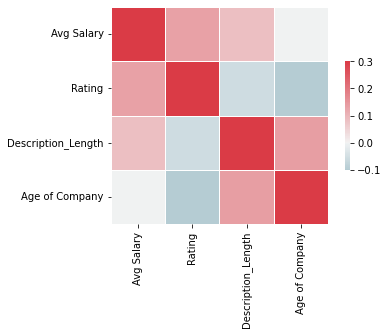

In [6]:
cmap = sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(df[['Avg Salary','Rating','Description_Length', 'Age of Company']].corr(), vmax =0.3, center =0, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink":.5})

<AxesSubplot:>

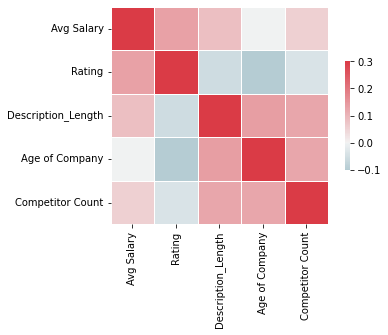

In [7]:
cmap = sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(df[['Avg Salary','Rating','Description_Length', 'Age of Company','Competitor Count']].corr(), vmax =0.3, center =0, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink":.5})

In [8]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Salary_Per_Hour', 'Min_Salary', 'Max_Salary', 'Avg Salary', 'State',
       'Is_Headquarters', 'Age of Company', 'Python', 'Spark', 'AWS', 'Excel',
       'Job Categories', 'Seniority', 'Description_Length', 'Competitor Count',
       'Revenue_Adj'],
      dtype='object')

In [9]:
senior = pd.pivot_table(df, index=['Seniority'], values='Avg Salary').sort_values('Avg Salary',ascending=True)
senior

,Avg Salary
Seniority,
Junior,71.000000
none,93.112591
Senior,120.299435


<AxesSubplot:xlabel='Job Categories'>

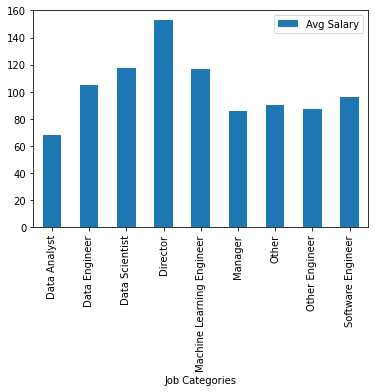

In [10]:
job_cat = pd.pivot_table(df, index =['Job Categories'], values='Avg Salary')

job_cat.plot(kind='bar')

<AxesSubplot:ylabel='State'>

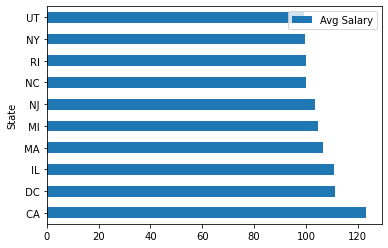

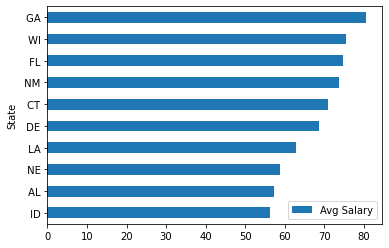

In [11]:
states = pd.pivot_table(df, index = 'State', values='Avg Salary').sort_values('Avg Salary',ascending=False).head(10)
states2 = pd.pivot_table(df, index = 'State', values='Avg Salary').sort_values('Avg Salary',ascending=True).head(10)


states.plot(kind='barh')

states2.plot(kind='barh')

In [12]:
job_tools=pd.pivot_table(df,index=['Python', 'Spark', 'AWS', 'Excel'],values='Avg Salary')
job_tools

Avg Salary
Python Spark AWS Excel            
0      0     0   0       92.354167
                 1       83.022917
             1   0       81.107143
                 1      102.333333
       1     0   0       47.000000
                 1       95.388889
             1   0      130.857143
                 1      106.300000
1      0     0   0      112.264286
                 1      106.164706
             1   0      119.365385
                 1      111.100000
       1     0   0      106.839286
                 1      113.821429
             1   0      123.683333
                 1      109.884615

In [13]:
job_cat=pd.pivot_table(df,index=['Job Categories', 'Seniority'],values='Avg Salary')
job_cat

Avg Salary
Job Categories            Seniority            
Data Analyst              Junior      53.250000
                          Senior      84.428571
                          none        61.163934
Data Engineer             Senior     124.200000
                          none        96.181159
Data Scientist            Junior     106.500000
                          Senior     138.183099
                          none       107.639073
Director                  none       152.772727
Machine Learning Engineer Senior     127.000000
                          none       109.500000
Manager                   none        86.058824
Other                     Senior     113.472973
                          none        80.312500
Other Engineer            Senior      86.300000
                          none        87.625000
Software Engineer         none        96.250000

In [14]:
job_sec=pd.pivot_table(df,index=['Sector'],values='Avg Salary')
job_sec

,Avg Salary
Sector,
-1,114.650000
Accounting & Legal,113.500000
Aerospace & Defense,101.400000
"Arts, Entertainment & Recreation",48.500000
Biotech & Pharmaceuticals,113.089888
Business Services,97.523529
"Construction, Repair & Maintenance",66.250000
Consumer Services,100.666667
Education,100.600000


In [15]:
job_hed=pd.pivot_table(df,index=['Is_Headquarters'],values='Avg Salary')
job_hed

,Avg Salary
Is_Headquarters,
0,102.307769
1,100.240497


In [16]:
rev = pd.pivot_table(df, index=['Revenue'], values='Avg Salary').sort_values('Avg Salary',ascending=True)
rev

,Avg Salary
Revenue,
$25 to $50 million (USD),82.838235
$500 million to $1 billion (USD),87.312500
$100 to $500 million (USD),87.852941
$5 to $10 billion (USD),93.470588
$10 to $25 million (USD),94.260000
$2 to $5 billion (USD),96.103448
Unknown / Non-Applicable,104.693252
$1 to $2 billion (USD),105.010870
$50 to $100 million (USD),105.973684


In [17]:
rev = pd.pivot_table(df, index=['Revenue_Adj'], values='Avg Salary').sort_values('Avg Salary',ascending=True)
rev

,Avg Salary
Revenue_Adj,
medium,87.312500
small,95.644737
Unknown / Non-Applicable,104.771341
big,106.887435


In [18]:
len(df.columns)

30

In [19]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Salary_Per_Hour', 'Min_Salary', 'Max_Salary', 'Avg Salary', 'State',
       'Is_Headquarters', 'Age of Company', 'Python', 'Spark', 'AWS', 'Excel',
       'Job Categories', 'Seniority', 'Description_Length', 'Competitor Count',
       'Revenue_Adj'],
      dtype='object')

In [20]:
dfDummies = pd.get_dummies(df.drop(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Salary_Per_Hour', 'Min_Salary', 'Max_Salary', 'State',
       'Is_Headquarters', 'Age of Company', 'Python', 'Spark', 'AWS', 'Excel',
       'Job Categories', 'Seniority', 'Description_Length', 'Competitor Count'], axis=1))

In [21]:
dfDummies.columns

Index(['Avg Salary', 'Revenue_Adj_Unknown / Non-Applicable', 'Revenue_Adj_big',
       'Revenue_Adj_medium', 'Revenue_Adj_small'],
      dtype='object')

<AxesSubplot:>

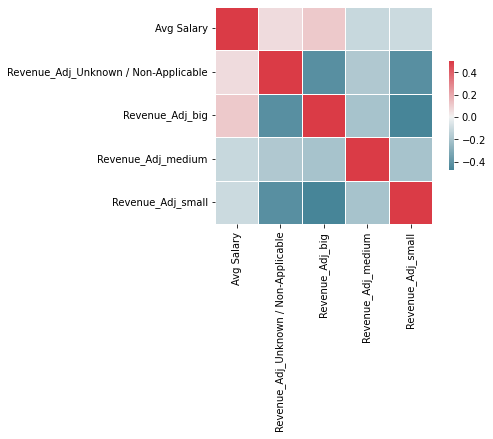

In [22]:
#as we can see there is only a very small correlation between the revenue and the avg salary.
#foe the big rev its a positive corellation and for small and medium its negative
cmap = sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(dfDummies[['Avg Salary', 'Revenue_Adj_Unknown / Non-Applicable', 'Revenue_Adj_big',
       'Revenue_Adj_medium', 'Revenue_Adj_small']].corr(), vmax =0.5, center =0, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink":.5})

In [23]:
dfDummies = pd.get_dummies(df.drop(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Salary_Per_Hour', 'Min_Salary', 'Max_Salary','State',
       'Is_Headquarters', 'Age of Company', 'Python', 'Spark', 'AWS', 'Excel', 'Seniority', 'Description_Length', 'Competitor Count',
       'Revenue_Adj'], axis=1))

In [24]:
dfDummies.columns

Index(['Avg Salary', 'Job Categories_Data Analyst',
       'Job Categories_Data Engineer', 'Job Categories_Data Scientist',
       'Job Categories_Director', 'Job Categories_Machine Learning Engineer',
       'Job Categories_Manager', 'Job Categories_Other',
       'Job Categories_Other Engineer', 'Job Categories_Software Engineer'],
      dtype='object')

In [25]:
#as you can see here there is a negitive correlation between the number of competitors to the avg salary(0 is NaN values)
comp = pd.pivot_table(df, index=['Competitor Count'], values='Avg Salary').sort_values('Avg Salary',ascending=True)
comp

,Avg Salary
Competitor Count,
4,56.500000
0,99.268000
3,103.591667
2,108.666667
1,109.900000


In [26]:
#as we can see it really makes a difference what catagory job you have
cmap = sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(dfDummies[['Avg Salary', 'Job Categories_Data Analyst',
       'Job Categories_Data Engineer', 'Job Categories_Data Scientist',
       'Job Categories_Director', 'Job Categories_Machine Learning Engineer',
       'Job Categories_Other Engineer', 'Job Categories_Software Engineer']].corr(), vmax =0.5, center =0, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink":.5})
       'Job Categories_Manager', 'Job Categories_Other',

IndentationError: unexpected indent (Temp/ipykernel_11456/3779811313.py, line 7)

# these are the categories we will use

# 1.job category
# 2.industry/sector (let's test it)
# 3.what languages you use
# 4.rating
# 5.description length
# 6.state
# 7.seniority


In [27]:
dfDummies = pd.get_dummies(df.drop(['Job Title'], axis=1))

<AxesSubplot:>

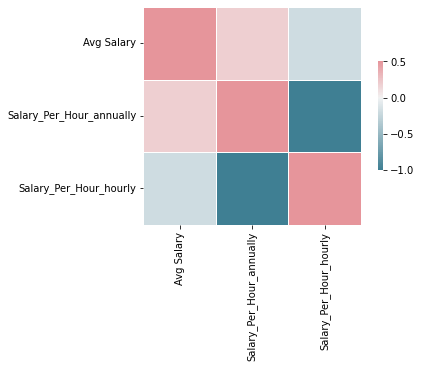

In [28]:
#here we see a negative correlation with hourly and a positive one for annually
cmap = sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(dfDummies[['Avg Salary', 'Salary_Per_Hour_annually', 'Salary_Per_Hour_hourly']].corr(), vmax =0.5, center =0, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink":.5})

In [29]:
#clearly the state you work also matters
job_state=pd.pivot_table(df,index= ['State'],values='Avg Salary').sort_values('Avg Salary',ascending=False)
job_state

,Avg Salary
State,
CA,123.040984
DC,111.100000
IL,110.687500
MA,106.520833
MI,104.500000
NJ,103.607143
NC,100.111111
RI,100.000000
NY,99.517857


In [30]:
dfDummies = pd.get_dummies(df.drop(['Job Title'], axis=1))

<AxesSubplot:>

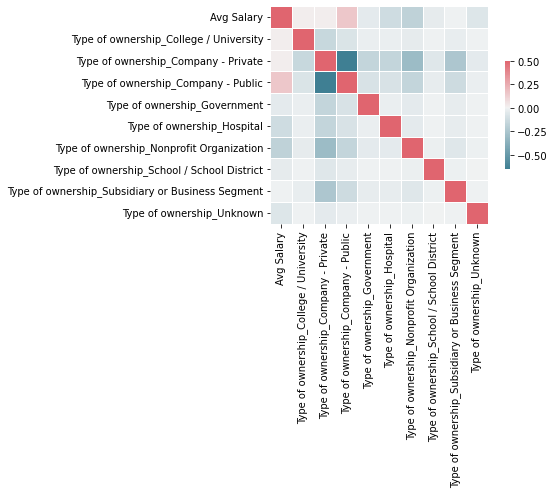

In [31]:
# unneccesary because there is very little correlation

cmap = sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(dfDummies[['Avg Salary', 'Type of ownership_College / University',
       'Type of ownership_Company - Private',
       'Type of ownership_Company - Public', 'Type of ownership_Government',
       'Type of ownership_Hospital',
       'Type of ownership_Nonprofit Organization',
       'Type of ownership_School / School District',
       'Type of ownership_Subsidiary or Business Segment',
       'Type of ownership_Unknown']].corr(), vmax =0.5, center =0, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink":.5})

<AxesSubplot:>

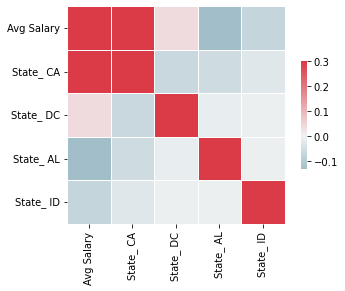

In [32]:
cmap = sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(dfDummies[['Avg Salary','State_ CA','State_ DC','State_ AL','State_ ID']].corr(), vmax =0.3, center =0, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink":.5})

In [33]:
df['Size'].value_counts()

1001 to 5000 employees     117
501 to 1000 employees      104
10000+ employees           104
201 to 500 employees        96
51 to 200 employees         79
5001 to 10000 employees     58
1 to 50 employees           25
Unknown                      9
-1                           1
Name: Size, dtype: int64

<AxesSubplot:>

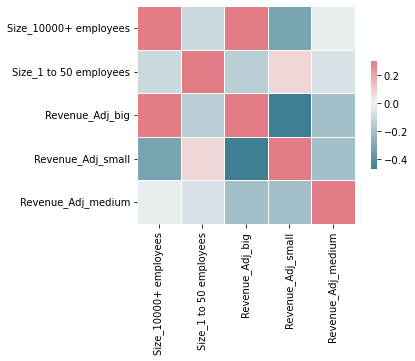

In [34]:
# here we are looking to see if there is a huge correlation between size of company and revenue, to see if both are necessary 
# to predict the salary, or if we should only use one of them.

cmap = sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(dfDummies[['Size_10000+ employees','Size_1 to 50 employees','Revenue_Adj_big','Revenue_Adj_small','Revenue_Adj_medium']].corr(), vmax =0.3, center =0, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink":.5})

<AxesSubplot:>

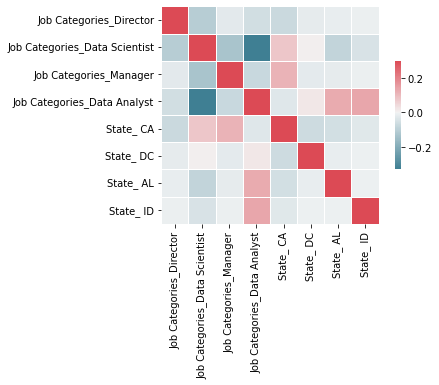

In [35]:
# top 2 and bottom 2 job categories and states. we are checking here if maybe certain states are limited to particular
# job opportunities. while there exist come correlations, we cannot rule out states as having a different 

cmap = sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(dfDummies[['Job Categories_Director','Job Categories_Data Scientist','Job Categories_Manager','Job Categories_Data Analyst','State_ CA','State_ DC','State_ AL','State_ ID']].corr(), vmax =0.3, center =0, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink":.5})

In [36]:
print("shaina is awesome")

shaina is awesome
